# yfinance Case Study - Yahoo opensource finance API 

### Gathering Finance Data

In [9]:
# download from yfinance website and using pandas can be loaded dataset or by using yfinance api
# installing yfinance api third party library
!pip install yfinance

In [5]:
# importing yfinance
import yfinance as yf

In [6]:
# downloading apple finance data
data=yf.download('AAPL',period='1y')

[*********************100%***********************]  1 of 1 completed


In [8]:
# displaying finance data
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-24,160.750000,162.139999,159.639999,161.940002,161.005554,69463600
2021-11-26,159.570007,160.449997,156.360001,156.809998,155.905167,76959800
2021-11-29,159.369995,161.190002,158.789993,160.240005,159.315369,88748200
2021-11-30,159.990005,165.520004,159.919998,165.300003,164.346176,174048100
2021-12-01,167.479996,170.300003,164.529999,164.770004,163.819229,152052500
...,...,...,...,...,...,...
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400
2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600
2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100


### Analysing

In [23]:
# importing neccesary packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mp
# import yfinance as yf # already imported above

In [12]:
# 1. check column names
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
# 2. view data
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-24,160.750000,162.139999,159.639999,161.940002,161.005554,69463600
2021-11-26,159.570007,160.449997,156.360001,156.809998,155.905167,76959800
2021-11-29,159.369995,161.190002,158.789993,160.240005,159.315369,88748200
2021-11-30,159.990005,165.520004,159.919998,165.300003,164.346176,174048100
2021-12-01,167.479996,170.300003,164.529999,164.770004,163.819229,152052500
...,...,...,...,...,...,...
2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400
2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600
2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100


In [18]:
# 3. change date from index to columns - to play with days or dates, date should be as column
data = data.reset_index()

In [19]:
# 4. check shape
data.shape

(252, 7)

In [21]:
# 5. check data types - date should be in datetime only, if not change the data type
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [25]:
# changing date data type - other is data.date.astype('datetime') like this
data['Date']=pd.to_datetime(data['Date'])

In [34]:
# 6. separate date into year, day, month and monthname - can be done only if its data type is datetime
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day
data['Month_name']=data['Date'].dt.month_name()
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Month_name
0,2021-11-24,160.750000,162.139999,159.639999,161.940002,161.005554,69463600,2021,11,24,November
1,2021-11-26,159.570007,160.449997,156.360001,156.809998,155.905167,76959800,2021,11,26,November
2,2021-11-29,159.369995,161.190002,158.789993,160.240005,159.315369,88748200,2021,11,29,November
3,2021-11-30,159.990005,165.520004,159.919998,165.300003,164.346176,174048100,2021,11,30,November
4,2021-12-01,167.479996,170.300003,164.529999,164.770004,163.819229,152052500,2021,12,1,December
...,...,...,...,...,...,...,...,...,...,...,...
247,2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400,2022,11,17,November
248,2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600,2022,11,18,November
249,2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100,2022,11,21,November
250,2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100,2022,11,22,November


##### pandas plot

<AxesSubplot:xlabel='Date'>

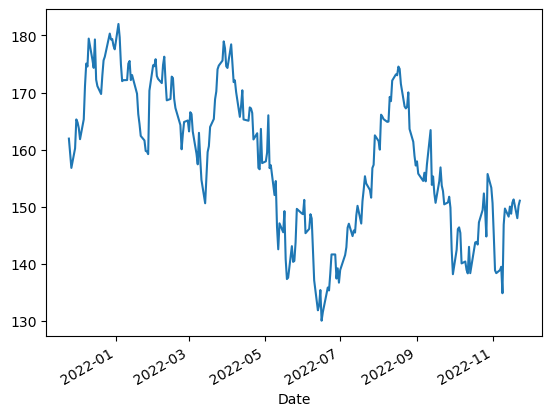

In [38]:
# pandas date analysis
data.groupby('Date').Close.sum().plot()

<AxesSubplot:xlabel='Month_name'>

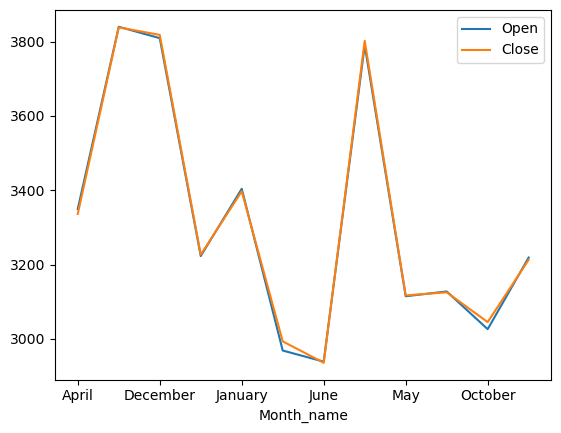

In [41]:
# pandas date analysis on closing and opening
data.groupby('Month_name').agg({'Open':sum,'Close':sum}).plot()

##### seaborn  line plot

<AxesSubplot:xlabel='Month_name', ylabel='Close'>

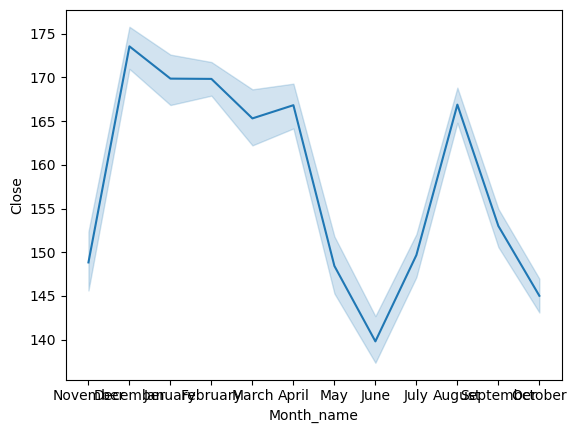

In [44]:
# lineplot
sb.lineplot(x='Month_name',y='Close',data=data)

<AxesSubplot:xlabel='Month_name', ylabel='Close'>

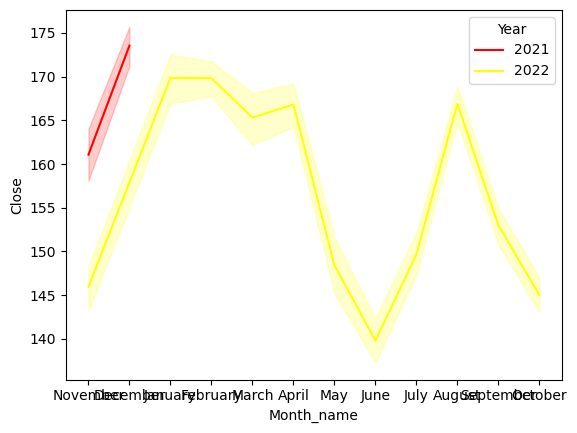

In [56]:
# line plot with palette ,year segregation - for which year which month
# like cmap here we use palette - can also take seasons for colouring
sb.lineplot(x='Month_name',y='Close',data=data,hue='Year',palette='autumn')

<AxesSubplot:xlabel='Month_name', ylabel='Close'>

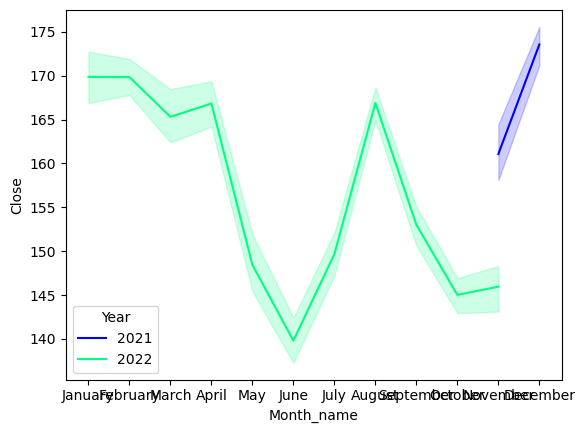

In [63]:
# lineplot with sorted month names - observe during june there is a fall in closing price
data=data.sort_values('Month')
sb.lineplot(x='Month_name',y='Close',data=data,hue='Year',palette='winter')

##### Using matplotlib.pyplot

In [60]:
# matplotlib is also visualization library and can be used along with seaborn
# using seaborn for graphs and other features like sizing graph, titling etc matplotlib can be utilized
# sizing graph for better visual can be done by seaborn but tough , whereas in matplotlib it can be easily done
# hence recomended to use matplotlib whenever seaborn is using

<AxesSubplot:xlabel='Month_name', ylabel='Close'>

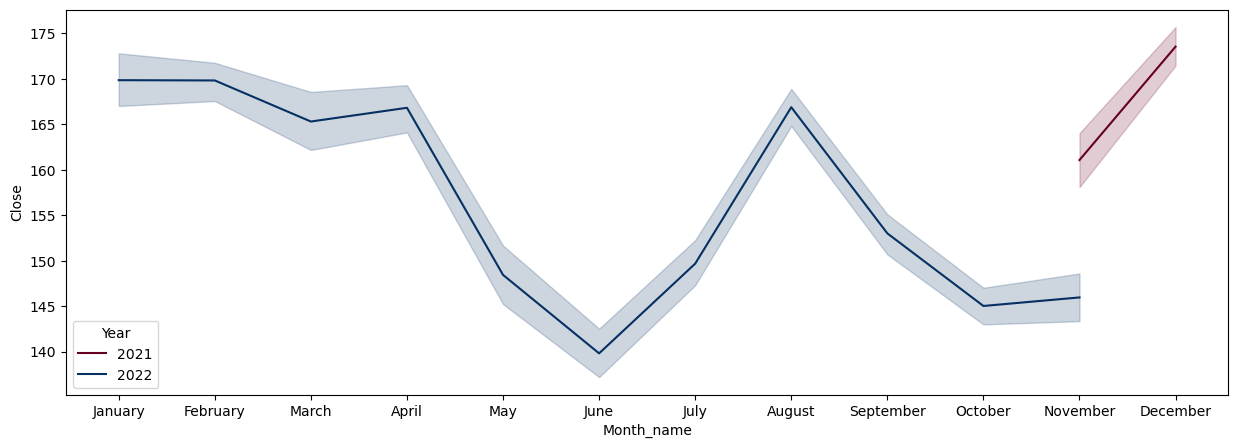

In [67]:
# resiging graph - checking the pattern in graph of trend
mp.figure(figsize=(15,5))
sb.lineplot(x='Month_name',y='Close',data=data,hue='Year',palette='RdBu')

<AxesSubplot:xlabel='Month_name', ylabel='Close'>

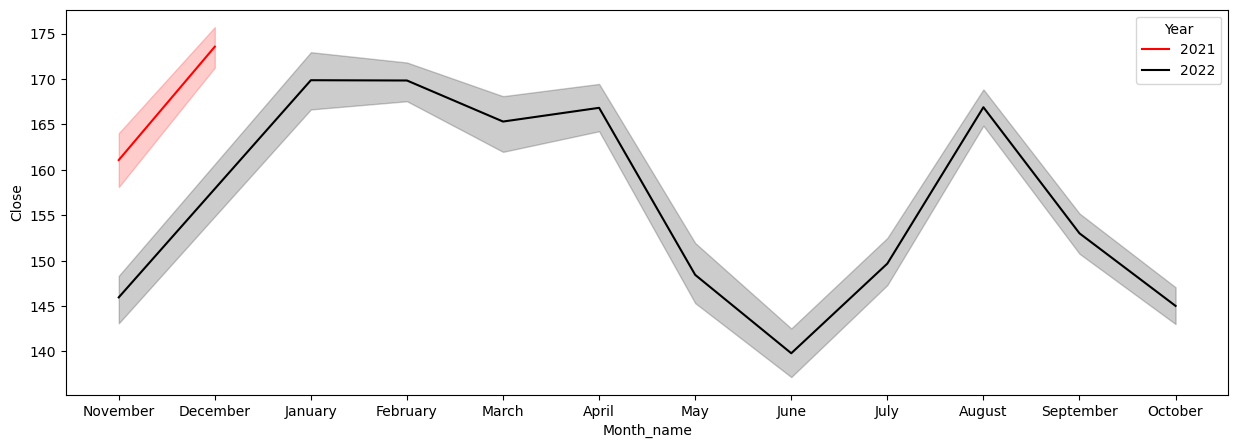

In [70]:
# sorting year and month wise - 2021 to be appear first
# if 2 full years data taken means can able to see which year which month is hight and low closing price, red and blue ovrelap
data=data.sort_values(['Year','Month'])
mp.figure(figsize=(15,5))
sb.lineplot(x='Month_name',y='Close',data=data,hue='Year',palette='flag')

##### seaborn heatmap - for corelation

<AxesSubplot:>

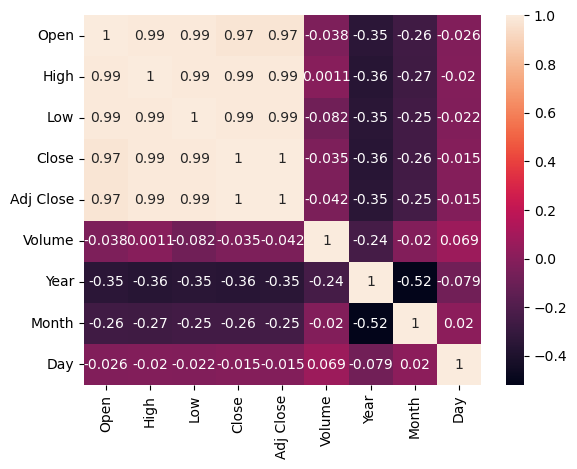

In [73]:
# observe negative corelation also there, year, month and day is dont hold more values and others are high
# also can increase size if required
sb.heatmap(data.corr(),annot=True)

##### seaborn boxplot

<AxesSubplot:xlabel='Month', ylabel='Close'>

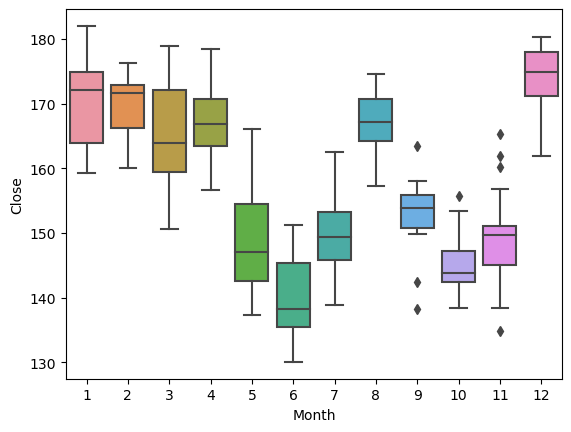

In [83]:
# can check outliers with this, also data where got high and low
# observe - 1. medians first 2 months same and changed later 
#           2. first 4 months positive and later downfall and rise
#           3. right or left skewness ( +ve or -ve )
#           4. outliers : googled by me - inter quartile range values i.e values fall between 25% to 75% 
sb.boxplot(x='Month',y='Close',data=data)

In [88]:
# check total skewness
data.Close.skew()

-0.12951300513524744

In [89]:
# check single month skewness
data[data['Month']==1].Close.skew()

-0.20029214767624545

In [93]:
# check all columns variance - very important
data.var()

C:\Users\Prashanth Reddy\AppData\Local\Temp\ipykernel_14824\1740184154.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


Open         1.652241e+02
High         1.604932e+02
Low          1.661812e+02
Close        1.634297e+02
Adj Close    1.581597e+02
Volume       6.762790e+14
Year         9.289825e-02
Month        1.188731e+01
Day          7.803053e+01
dtype: float64

In [92]:
# check single column variance
data.Close.var()

163.42965155715316

##### Task given

In [ ]:
# 1. Find out the variance and standard deviation for each month and weekday - open and close

In [ ]:
#2. Find out the average for each month and each week day - open and close

In [ ]:
# 3. Yearly trend

In [ ]:
# 4. Monthly trend

In [ ]:
# 5. Distributions of each month for - close and opening

In [ ]:
# 6. Deviation from closing and opening price, weekda, month